In [2]:
import numpy as np
from typing import List
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

from lib.TensorV2 import Tensor, force_tensor_method
from lib.NN import Dense, ReLU, Module
from lib.Utils import SyntheticData
from lib.Loss import MSE
from lib.Optimizers import SGD

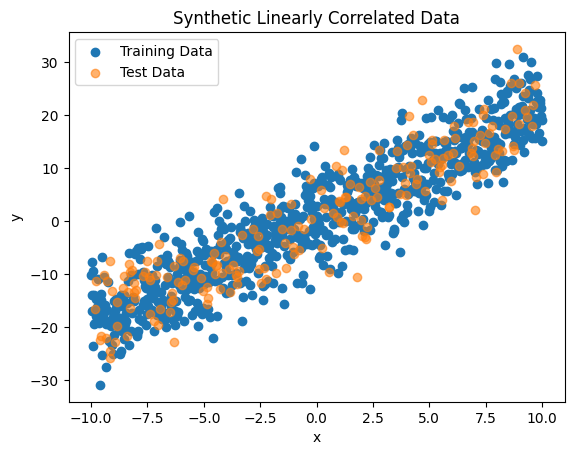

In [3]:
n_samples = 1000

x, y = SyntheticData.linear(n_samples)
x, y = shuffle(x, y, random_state=0)

# split into train and test sets
train_split = int(0.8 * n_samples)
test_split = n_samples - train_split

train_x, test_x = x[:train_split], x[train_split:]
train_y, test_y = y[:train_split], y[train_split:]

train_inputs = Tensor(train_x, requires_grad=True)
train_targets = Tensor(train_y, requires_grad=True)

test_inputs = Tensor(test_x, requires_grad=True)
test_targets = Tensor(test_y, requires_grad=True)

# Plot
plt.scatter(train_x, train_y, label="Training Data")
plt.scatter(test_x, test_y, label="Test Data", alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Synthetic Linearly Correlated Data')
plt.show()

In [4]:
class MLP(Module):
    def __init__(self, input_dim: int, hidden_dim_1: int, hidden_dim_2: int, output_dim: int):
        super().__init__() # init Module

        self.add_module("dense1", Dense(input_dim, hidden_dim_1))
        self.add_module("relu1", ReLU())
        self.add_module("dense2", Dense(hidden_dim_1, hidden_dim_2))
        self.add_module("relu2", ReLU())
        self.add_module("dense3", Dense(hidden_dim_2, output_dim))

    @force_tensor_method
    def forward(self, x: Tensor) -> Tensor:
        # first dense layer
        x = self.get_module("dense1")(x)
        x = self.get_module("relu1")(x)

        # second dense layer
        x = self.get_module("dense2")(x)
        x = self.get_module("relu2")(x)

        # third dense layer
        x = self.get_module("dense3")(x)

        return x
    
    def __call__(self, x: Tensor) -> Tensor:
        return self.forward(x)

    def parameters(self) -> List[Tensor]:
        return [p for module in self._modules.values() for p in module.parameters()]

In [5]:
model = MLP(1, 1, 1, 1)
criterion = MSE()
optimizer = SGD(model.parameters(), lr=0.01)

In [7]:
for epoch in range(100):
    out = model(train_inputs)
    loss = criterion(out, train_targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    epoch_loss = loss.data / len(train_inputs)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss: {epoch_loss:0.4f}")

AttributeError: 'Tensor' object has no attribute 'mean'